# Análisis Estadísticos

En este ***notebook*** se presentan de manera reproducible los análisis estadísticos del artículo "**PRIMER REGISTRO DEL GÉNERO DE DINOFLAGELADO TECADO METADINOPHYSIS NIE & WANG (DINOPHYCEAE: DINOPHYSIALES) Y ANÁLISIS DE SU DENSIDAD EN ÁREAS COSTERAS DEL PACIFICO COLOMBIANO**". 

## Librerías

Librerías usadas en este análisis.

Para instalar las librerías a usar en este análisis se deben ejecutar los siguientes comandos:
```conda
conda install geopandas
conda install --channel conda-forge esda
conda install -c conda-forge splot
conda install seaborn

```

In [3]:
%matplotlib inline
#Librerías utilizadas para este análisis.

#Manipulación de datos
import geopandas as gpd
import pandas as pd

#Análisis de autocorrelación espacial
import matplotlib.pyplot as plt
from esda.moran import Moran
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot
from splot.esda import plot_moran

#Análisis estadísticos
from seaborn import boxplot as bxp
from scipy.stats  import kruskal
from scipy.stats import mannwhitneyu

# Análisis de autocorrelación espacial de la densidad

Los análisis de autocorrelación espacial de la densidad de *Metadinophysis* sp. en las bahías de Buenaventura y Málaga tienen como objetivo comprobar si esta variable presenta algún tipo de estructura espacial. Para esto se realizó un análisis calculando el índice de Moran (I de Moran) para la densidad, en cada evento mareal en el área de estudio.


### Marea Baja

A continuación se presenta el análisis de la autocorrelación espacial de los datos de densidad en marea baja.

Con el siguiente código se cargan los datos en formato dbf (dBase) que están asociados a los *.shape* que se generaron para guardar la información espacial:

In [12]:
Bajagdf = gpd.read_file('C:\Documentos\metadinophysis/SIG_Data/Densidad_Baja.dbf')


Bajagdf


OBJECTID  Longitud  Latitud Estaciones Marea  ABUN         Bahia  \
0          1 -77.32536  3.97272        M1B  Baja     0        Malaga   
1          2 -77.32061  3.89664        M2B  Baja  1667        Malaga   
2          3 -77.35525  3.90114        M3B  Baja     0        Malaga   
3          4 -77.32536  3.92775        M4B  Baja  1000        Malaga   
4          5 -77.33739  3.93908        M5B  Baja   333        Malaga   
5          6 -77.27608  3.99153        M6B  Baja  2667        Malaga   
6          7 -77.06667  3.86667        B1B  Baja     0  Buenaventura   
7          8 -77.06750  3.89417        B2B  Baja   333  Buenaventura   
8          9 -77.08167  3.89200        B3B  Baja     0  Buenaventura   
9         10 -77.11167  3.86000        B4B  Baja   333  Buenaventura   
10        11 -77.13200  3.84917        B5B  Baja   333  Buenaventura   
11        12 -77.14550  3.84083        B6B  Baja     0  Buenaventura   
12        13 -77.14033  3.82083        B7B  Baja     0  Buenaventura   
13        14 -77.06194  3.88972        B8B  Baja     0  Buenaventura   

    Numero_Est                   geometry  
0            1  POINT (-77.32536 3.97272)  
1            2  POINT (-77.32061 3.89664)  
2            3  POINT (-77.35525 3.90114)  
3            4  POINT (-77.32536 3.92775)  
4            5  POINT (-77.33739 3.93908)  
5            6  POINT (-77.27608 3.99153)  
6            1  POINT (-77.06667 3.86667)  
7            2  POINT (-77.06750 3.89417)  
8            3  POINT (-77.08167 3.89200)  
9            4  POINT (-77.11167 3.86000)  
10           5  POINT (-77.13200 3.84917)  
11           6  POINT (-77.14550 3.84083)  
12           7  POINT (-77.14033 3.82083)  
13           8  POINT (-77.06194 3.88972)

A continuación se calculan los pesos de contiguidad (*w*) entre los puntos de muestreo y se transforman estos pesos para que estén estadarizados por filas:

In [13]:
abunBaja = Bajagdf['ABUN'].values
wBaja = Queen.from_dataframe(Bajagdf)
wBaja.transform = 'r' #Estadarización por filas


Se calcula el índice de Moran a partir de los pesos de las distancias entre los puntos de muestreo y los valores de la densidad. 

In [14]:
wBaja = Queen.from_dataframe(Bajagdf)
moranBaja = Moran(abunBaja, wBaja)
print("El valor del índice de Moran es: ")
moranBaja.I


El valor del índice de Moran es: 


0.0443220033551808

El  valor para la estadística se interpreta contra una distribución de referencia bajo la hipótesis nula de aleatoriedad espacial completa. El paquete *PySAL* utiliza el enfoque de permutaciones espaciales aleatorias.

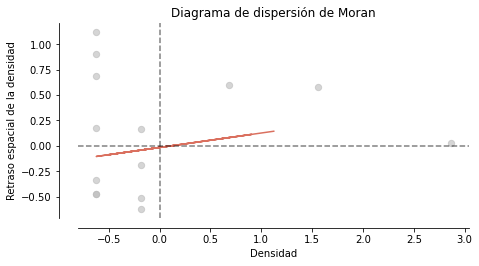

In [15]:
fig, axbaja = moran_scatterplot(moranBaja, aspect_equal=True)
axbaja.set_title('Diagrama de dispersión de Moran')
axbaja.set_xlabel('Densidad')
axbaja.set_ylabel('Retraso espacial de la densidad')
plt.show()


**Figura suplementaria 2:** Diagrama de dispesión de Moran de la densidad de *Metadinophysis* en marea baja.

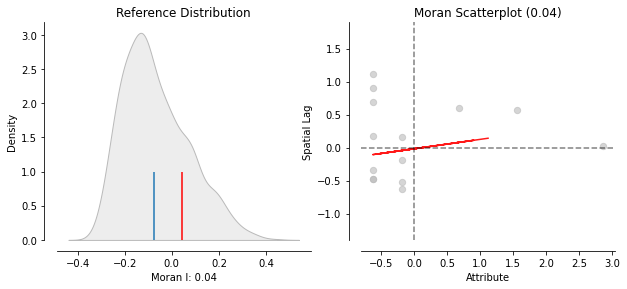

In [16]:
fig, dispbaja=plot_moran(moranBaja, zstandard=True, figsize=(10,4), fitline_kwds=dict(color='red'))
plt.show()

No hay diferencias significativas entre la distribución aleatoria y la distribución de los datos de densidad.
***No se evidencia una correlación espacial.***

In [17]:
moranBaja.p_sim


0.219

### Marea Alta

A continuación se presenta el análisis de la autocorrelación espacial de los datos de densidad en marea alta.

Con el siguiente código se cargan los datos en formato dbf (dBase) que están asociados a los *.shape* que se generaron para guardar la información espacial:

In [18]:
Altagdf = gpd.read_file('C:\Documentos\metadinophysis/SIG_Data/Densidad_Alta.dbf')
Altagdf


OBJECTID  Longitud  Latitud Estaciones Marea   ABUN         Bahia  \
0          1 -77.32536  3.97272        M1A  Alta   2333        Malaga   
1          2 -77.32061  3.89664        M2A  Alta   2333        Malaga   
2          3 -77.35525  3.90114        M3A  Alta   1000        Malaga   
3          4 -77.32536  3.92775        M4A  Alta   1000        Malaga   
4          5 -77.33739  3.93908        M5A  Alta   1333        Malaga   
5          6 -77.27608  3.99153        M6A  Alta   3333        Malaga   
6          7 -77.06667  3.86667        B1A  Alta   4000  Buenaventura   
7          8 -77.06750  3.89417        B2A  Alta   5000  Buenaventura   
8          9 -77.08167  3.89200        B3A  Alta    667  Buenaventura   
9         10 -77.11167  3.86000        B4A  Alta    667  Buenaventura   
10        11 -77.13200  3.84917        B5A  Alta  14333  Buenaventura   
11        12 -77.14550  3.84083        B6A  Alta   2333  Buenaventura   
12        13 -77.14033  3.82083        B7A  Alta    333  Buenaventura   
13        14 -77.06194  3.88972        B8A  Alta   5667  Buenaventura   

    Estacion_N                               geometry  
0            1  POINT Z (-77.32536 3.97272 140.00000)  
1            2  POINT Z (-77.32061 3.89664 140.00000)  
2            3   POINT Z (-77.35525 3.90114 60.00000)  
3            4   POINT Z (-77.32536 3.92775 60.00000)  
4            5   POINT Z (-77.33739 3.93908 80.00000)  
5            6  POINT Z (-77.27608 3.99153 200.00000)  
6            1  POINT Z (-77.06667 3.86667 240.00000)  
7            2  POINT Z (-77.06750 3.89417 300.00000)  
8            3   POINT Z (-77.08167 3.89200 40.00000)  
9            4   POINT Z (-77.11167 3.86000 40.00000)  
10           5  POINT Z (-77.13200 3.84917 860.00000)  
11           6  POINT Z (-77.14550 3.84083 140.00000)  
12           7   POINT Z (-77.14033 3.82083 20.00000)  
13           8  POINT Z (-77.06194 3.88972 340.00000)

A continuación se calculan los pesos de las distancias entre los puntos de muestreo:


In [19]:
abunAlta = Altagdf['ABUN'].values
wAlta = Queen.from_dataframe(Altagdf)
wAlta.transform = 'r'

Se calcula el índice de Moran a partir de los pesos de las distancias entre los puntos de muestreo y los valores de la densidad:

In [20]:
wAlta = Queen.from_dataframe(Altagdf)
moranAlta = Moran(abunAlta, wAlta)
print("El valor del índice de Moran es: ")
moranAlta.I

El valor del índice de Moran es: 


-0.1601133364998084

El  valor para la estadística se interpreta contra una distribución de referencia bajo la hipótesis nula de aleatoriedad espacial completa. El paquete *PySAL* utiliza el enfoque de permutaciones espaciales aleatorias.

In [21]:
fig, axalta = moran_scatterplot(moranAlta, aspect_equal=True)
axalta.set_title('Diagrama de dispersión de Moran')
axalta.set_xlabel('Densidad')
axalta.set_ylabel('Retraso espacial de la densidad')
plt.show()


**Figura suplementaria 3:** Diagrama de dispesión de Moran de la densidad de *Metadinophysis* en marea alta.

In [22]:
plot_moran(moranAlta, zstandard=True, figsize=(10,4), fitline_kwds=dict(color='red'))
plt.show()

No hay diferencias significativas entre la distribución aleatoria y la distribución de los datos de densidad.
No se evidencia una correlación espacial.

In [23]:
moranAlta.p_sim

0.25

### Análisis de la densidad entre las mareas y la bahías.

A continuación se presentan los análisis de la densidad comparando entre los cuatro factores evaluados para la densidad de *Metadinophysis*: **Bahía de Buenaventura en marea alta**, **Bahía de Buenaventura en marea baja**, **Bahía Málaga en marea alta** y **Bahía de Málaga en marea baja**.


A continuación se unifican los datos para generar un solo conjunto de datos que permita realizar el análisis planteado:

In [24]:
AltaMalaga = Altagdf[Altagdf['Bahia']=='Malaga']
BajaMalaga = Bajagdf[Bajagdf['Bahia']=="Malaga"]
Malaga=pd.concat([AltaMalaga, BajaMalaga])

AltaBuenaventura = Altagdf[Altagdf['Bahia']=='Buenaventura']
BajaBuenaventura = Bajagdf[Bajagdf['Bahia']=="Buenaventura"]
Buenaventura=pd.concat([AltaBuenaventura, BajaBuenaventura])

total=pd.concat([Buenaventura, Malaga])
total

OBJECTID  Longitud  Latitud Estaciones Marea   ABUN         Bahia  \
6          7 -77.06667  3.86667        B1A  Alta   4000  Buenaventura   
7          8 -77.06750  3.89417        B2A  Alta   5000  Buenaventura   
8          9 -77.08167  3.89200        B3A  Alta    667  Buenaventura   
9         10 -77.11167  3.86000        B4A  Alta    667  Buenaventura   
10        11 -77.13200  3.84917        B5A  Alta  14333  Buenaventura   
11        12 -77.14550  3.84083        B6A  Alta   2333  Buenaventura   
12        13 -77.14033  3.82083        B7A  Alta    333  Buenaventura   
13        14 -77.06194  3.88972        B8A  Alta   5667  Buenaventura   
6          7 -77.06667  3.86667        B1B  Baja      0  Buenaventura   
7          8 -77.06750  3.89417        B2B  Baja    333  Buenaventura   
8          9 -77.08167  3.89200        B3B  Baja      0  Buenaventura   
9         10 -77.11167  3.86000        B4B  Baja    333  Buenaventura   
10        11 -77.13200  3.84917        B5B  Baja    333  Buenaventura   
11        12 -77.14550  3.84083        B6B  Baja      0  Buenaventura   
12        13 -77.14033  3.82083        B7B  Baja      0  Buenaventura   
13        14 -77.06194  3.88972        B8B  Baja      0  Buenaventura   
0          1 -77.32536  3.97272        M1A  Alta   2333        Malaga   
1          2 -77.32061  3.89664        M2A  Alta   2333        Malaga   
2          3 -77.35525  3.90114        M3A  Alta   1000        Malaga   
3          4 -77.32536  3.92775        M4A  Alta   1000        Malaga   
4          5 -77.33739  3.93908        M5A  Alta   1333        Malaga   
5          6 -77.27608  3.99153        M6A  Alta   3333        Malaga   
0          1 -77.32536  3.97272        M1B  Baja      0        Malaga   
1          2 -77.32061  3.89664        M2B  Baja   1667        Malaga   
2          3 -77.35525  3.90114        M3B  Baja      0        Malaga   
3          4 -77.32536  3.92775        M4B  Baja   1000        Malaga   
4          5 -77.33739  3.93908        M5B  Baja    333        Malaga   
5          6 -77.27608  3.99153        M6B  Baja   2667        Malaga   

    Estacion_N                               geometry  Numero_Est  
6          1.0  POINT Z (-77.06667 3.86667 240.00000)         NaN  
7          2.0  POINT Z (-77.06750 3.89417 300.00000)         NaN  
8          3.0   POINT Z (-77.08167 3.89200 40.00000)         NaN  
9          4.0   POINT Z (-77.11167 3.86000 40.00000)         NaN  
10         5.0  POINT Z (-77.13200 3.84917 860.00000)         NaN  
11         6.0  POINT Z (-77.14550 3.84083 140.00000)         NaN  
12         7.0   POINT Z (-77.14033 3.82083 20.00000)         NaN  
13         8.0  POINT Z (-77.06194 3.88972 340.00000)         NaN  
6          NaN              POINT (-77.06667 3.86667)         1.0  
7          NaN              POINT (-77.06750 3.89417)         2.0  
8          NaN              POINT (-77.08167 3.89200)         3.0  
9          NaN              POINT (-77.11167 3.86000)         4.0  
10         NaN              POINT (-77.13200 3.84917)         5.0  
11         NaN              POINT (-77.14550 3.84083)         6.0  
12         NaN              POINT (-77.14033 3.82083)         7.0  
13         NaN              POINT (-77.06194 3.88972)         8.0  
0          1.0  POINT Z (-77.32536 3.97272 140.00000)         NaN  
1          2.0  POINT Z (-77.32061 3.89664 140.00000)         NaN  
2          3.0   POINT Z (-77.35525 3.90114 60.00000)         NaN  
3          4.0   POINT Z (-77.32536 3.92775 60.00000)         NaN  
4          5.0   POINT Z (-77.33739 3.93908 80.00000)         NaN  
5          6.0  POINT Z (-77.27608 3.99153 200.00000)         NaN  
0          NaN              POINT (-77.32536 3.97272)         1.0  
1          NaN              POINT (-77.32061 3.89664)         2.0  
2          NaN              POINT (-77.35525 3.90114)         3.0  
3          NaN              POINT (-77.32536 3.92775)         4.0  
4          NaN              POINT (-77.33739 3.939

### Diagrama de cajas

Al analizar el gráfico de cajas se puede observar mayor variación de los datos de densidad en la Bahía de Buenaventura durante la marea alta y la menor variación en la misma bahía durante la marea baja.

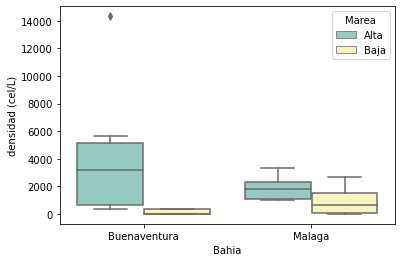

In [25]:
total=pd.concat([Buenaventura, Malaga])

ax = bxp(x="Bahia", y="ABUN", hue="Marea", data=total, palette="Set3")
ax.set_ylabel('densidad (cel/L)')
plt.show()

**Figura suplementaria 4:** Diagrama de cajas de la densidad de *Metadinophysis* en los cuatro factores considerados en este estudio. 

Para someter a prueba si existen diferencias significativas entre la densidad entre los cuatro factores propuestos en este análisis, se utilizó la prueba no paramétrica de Kruskal-Wallis:

In [26]:

kruskal(AltaMalaga['ABUN'], BajaMalaga['ABUN'], AltaBuenaventura['ABUN'],BajaBuenaventura['ABUN'])


KruskalResult(statistic=15.021854861305684, pvalue=0.001798067402344443)

Se encontraron diferencias signifivativas entre los cuatro factores evaluados para la densidad de *Metadinophysis*.

Para evaluar cuales factores marca la diferencia entre todos, se realizó una pruba *post-hoc* de Mann-Whitney:
    
**Bahía Málaga en marea alta** *vs* **Bahía Málaga en marea baja**

In [27]:
mannwhitneyu(AltaMalaga['ABUN'], BajaMalaga['ABUN'])

MannwhitneyuResult(statistic=27.0, pvalue=0.16894702169308384)

**Bahía Buenaventura en marea alta** *vs* **Bahía Buenaventura en marea baja**

In [28]:
mannwhitneyu(AltaBuenaventura['ABUN'],BajaBuenaventura['ABUN'])

MannwhitneyuResult(statistic=62.5, pvalue=0.0012597326007818335)

**Bahía Málaga en marea alta** *vs* **Bahía Buenaventura en marea alta**

In [29]:
mannwhitneyu(AltaMalaga['ABUN'], AltaBuenaventura['ABUN'])

MannwhitneyuResult(statistic=20.0, pvalue=0.649212071392224)

**Bahía Málaga en marea baja** *vs* **Bahía Buenaventura en marea baja**

In [30]:
mannwhitneyu(BajaMalaga['ABUN'],BajaBuenaventura['ABUN'])

MannwhitneyuResult(statistic=35.5, pvalue=0.12457590604752848)

**Bahía Buenaventura en marea alta** *vs* **Bahía Málaga en marea baja**

In [31]:
mannwhitneyu(AltaBuenaventura['ABUN'],BajaMalaga['ABUN'])

MannwhitneyuResult(statistic=37.5, pvalue=0.09221005670145113)

**Bahía Málaga en marea alta** *vs* **Bahía Buenaventura en marea baja**

In [32]:
mannwhitneyu(AltaMalaga['ABUN'], BajaBuenaventura['ABUN'])

MannwhitneyuResult(statistic=48.0, pvalue=0.0017815648166345512)

Los factores que marcan la diferencia para la densidad de *Metadinophysis* en las bahías de Buenaventura y Málaga entre la marea baja y la marea alta son: la diferencia entre la densidad encontrada en la marea alta y la marea baja de la bahía de Buenaventura y la diferencia entre la marea alta de la bahía de Málaga y la marea baja de la bahía de Buenaventura.